In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [50]:
df = pd.read_csv('CardTransactions.csv')
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [51]:
df.drop([ "repeat_retailer", "used_chip"], axis=1, inplace=True)

In [52]:

X = df[["distance_from_home", "distance_from_last_transaction",	"ratio_to_median_purchase_price", "used_pin_number","online_order"]]
y = df["fraud"]

X = X.values
y = y.values

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

print(len(X_train))

750000


In [54]:
knn5 = KNeighborsClassifier(n_neighbors = 5)
knn3 = KNeighborsClassifier(n_neighbors = 3)
knn1 = KNeighborsClassifier(n_neighbors=1)

In [55]:
knn5.fit(X_train, y_train)
knn3.fit(X_train, y_train)
knn1.fit(X_train, y_train)

y_pred_5 = knn5.predict(X_test)
y_pred_3 = knn5.predict(X_test)
y_pred_1 = knn1.predict(X_test)

In [56]:
print(y_pred_5)
print(y_test)

[1. 0. 0. ... 0. 0. 0.]
[1. 0. 0. ... 0. 0. 0.]


In [57]:
print("Accuracy with k=5", accuracy_score(y_test, y_pred_5)*100)
print("Accuracy with k=3", accuracy_score(y_test, y_pred_3)*100)
print("Accuracy with k=1", accuracy_score(y_test, y_pred_1)*100)

Accuracy with k=5 97.3696
Accuracy with k=3 97.3696
Accuracy with k=1 97.4512


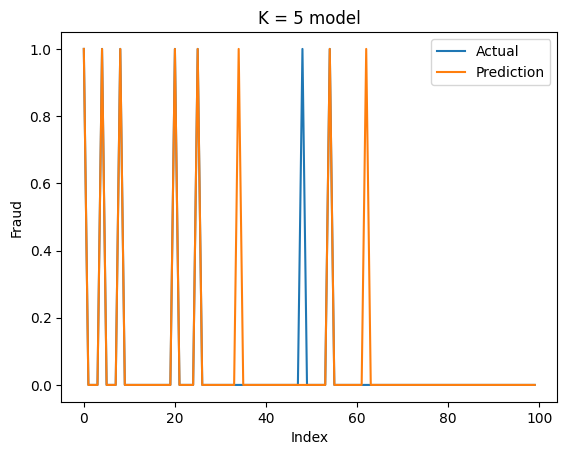

In [61]:
y_test.tolist()
y_pred_3.tolist()
y_pred_5.tolist()
y_pred_1.tolist

plt.plot([x for x in range(100)], y_test[:100], label='Actual')
plt.plot([x for x in range(100)], y_pred_5[:100], label='Prediction')
plt.xlabel('Index')
plt.ylabel('Fraud')
plt.title('K = 5 model')

plt.legend()
plt.show()

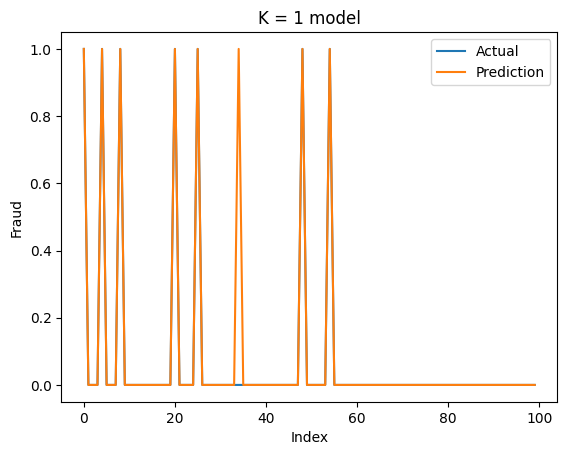

In [64]:
plt.plot([x for x in range(100)], y_test[:100], label='Actual')
plt.plot([x for x in range(100)], y_pred_1[:100], label='Prediction')
plt.xlabel('Index')
plt.ylabel('Fraud')
plt.title('K = 1 model')

plt.legend()
plt.show()